# Modelo para cálculo de imóveis na cidade de São Paulo

O objetivo deste projeto é construir um modelo preditivo capaz de calcular o preço de um imóvel na cidade de São Paulo.  

# Aquisição, pré-processamento e análise descritiva

In [1]:
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/fbarth/ds-saint-paul/master/data/20140917_imoveis_filtrados_final.csv_shaped.csv"
s=requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')), sep=",")

In [2]:
df.head()

,bairro,preco,area,suites,dormitorios,banheiros,vagas
0,vila-nova-conceicao,490000.0,32.0,1.0,1.0,1.0,1.0
1,vila-nova-conceicao,3180000.0,157.0,2.0,2.0,2.0,2.0
2,vila-nova-conceicao,1900000.0,205.0,2.0,3.0,3.0,3.0
3,vila-nova-conceicao,3565000.0,193.0,3.0,3.0,3.0,3.0
4,vila-nova-conceicao,1605000.0,116.0,1.0,3.0,2.0,2.0


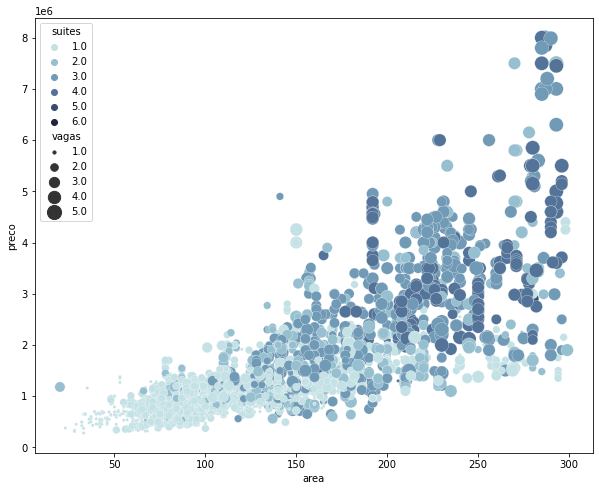

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="area", y="preco",
                     hue="suites", size="vagas",
                     palette=cmap, sizes=(10, 200),
                     data=df)

* Listar a quantidade de imóveis por bairro existente no dataset

In [4]:
df['bairro'].value_counts()

vila-mariana           1714
paraiso                 809
vila-nova-conceicao     794
vila-sonia              314
perto_ibirapuera        129
Name: bairro, dtype: int64

* Considere apenas os imóveis do bairo paraiso

In [5]:
df = df[df['bairro'] == 'paraiso']

* Depois de considerar apenas os imóveis do bairro paraiso o tamanho do dataset precisa ser exatamente igual a: 

In [6]:
df.shape

(809, 7)

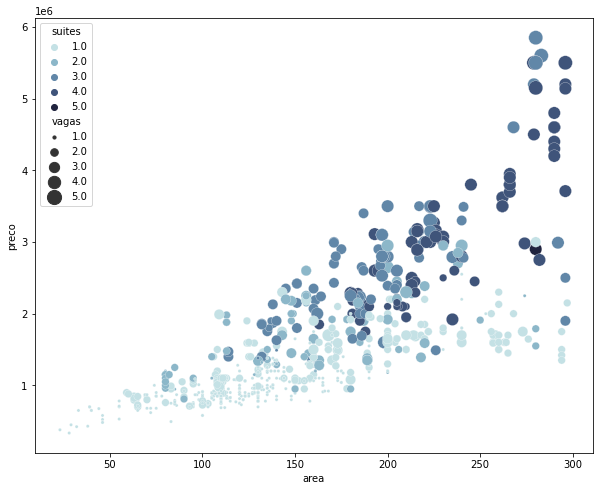

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="area", y="preco",
                     hue="suites", size="vagas",
                     palette=cmap, sizes=(10, 200),
                     data=df)

In [ ]:
df.head()

* A quantidade suites não pode ser maior que a quantidade de dormitórios e a quantidade de suites também não pode ser maior que a quantidade de banheiros. Exclua todos os exemplos que não satisfazem esta restrição. Estes exemplos provavelmente são erros de coleta de dados.

In [8]:
df = df[df['suites'] <= df['dormitorios']]
df = df[df['suites'] <= df['banheiros']]

* Depois deste filtro o dataset precisa ter o tamanho abaixo: 

In [9]:
df.shape

(786, 7)

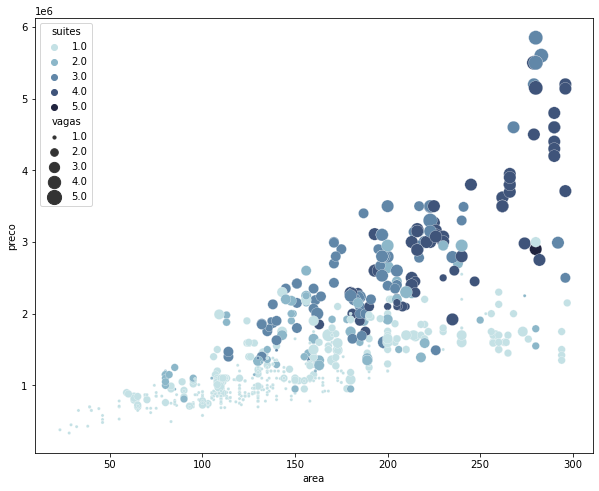

In [10]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="area", y="preco",
                     hue="suites", size="vagas",
                     palette=cmap, sizes=(10, 200),
                     data=df)

* Visto que agora a variável bairro tem apenas um valor, você deve remover a mesma

In [11]:
df = df.drop(columns=['bairro'])

* Depois deste filtro o dataset precisa ter a seguinte estrutura:

In [12]:
df.head()

,preco,area,suites,dormitorios,banheiros,vagas
794,2400000.0,213.0,4.0,4.0,6.0,3.0
795,530000.0,55.0,1.0,2.0,2.0,1.0
796,1450000.0,157.0,2.0,3.0,4.0,2.0
797,1070000.0,135.0,1.0,3.0,2.0,1.0
798,2100000.0,210.0,4.0,4.0,5.0,2.0


* Qual é o valor mínimo e máximo dos preços dos imóveis? 

In [13]:
x = df['preco'].describe()
x

count    7.860000e+02
mean     1.563701e+06
std      8.914672e+05
min      3.350000e+05
25%      9.050000e+05
50%      1.299500e+06
75%      1.920000e+06
max      5.850000e+06
Name: preco, dtype: float64

<AxesSubplot:title={'center':'Preço dos imóveis'}, ylabel='Frequency'>

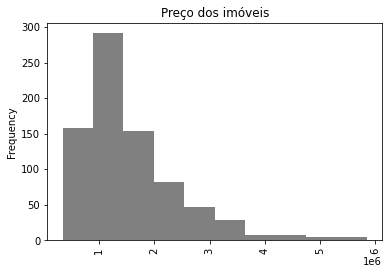

In [14]:
df['preco'].plot(kind='hist', color='gray', title='Preço dos imóveis', rot=90)

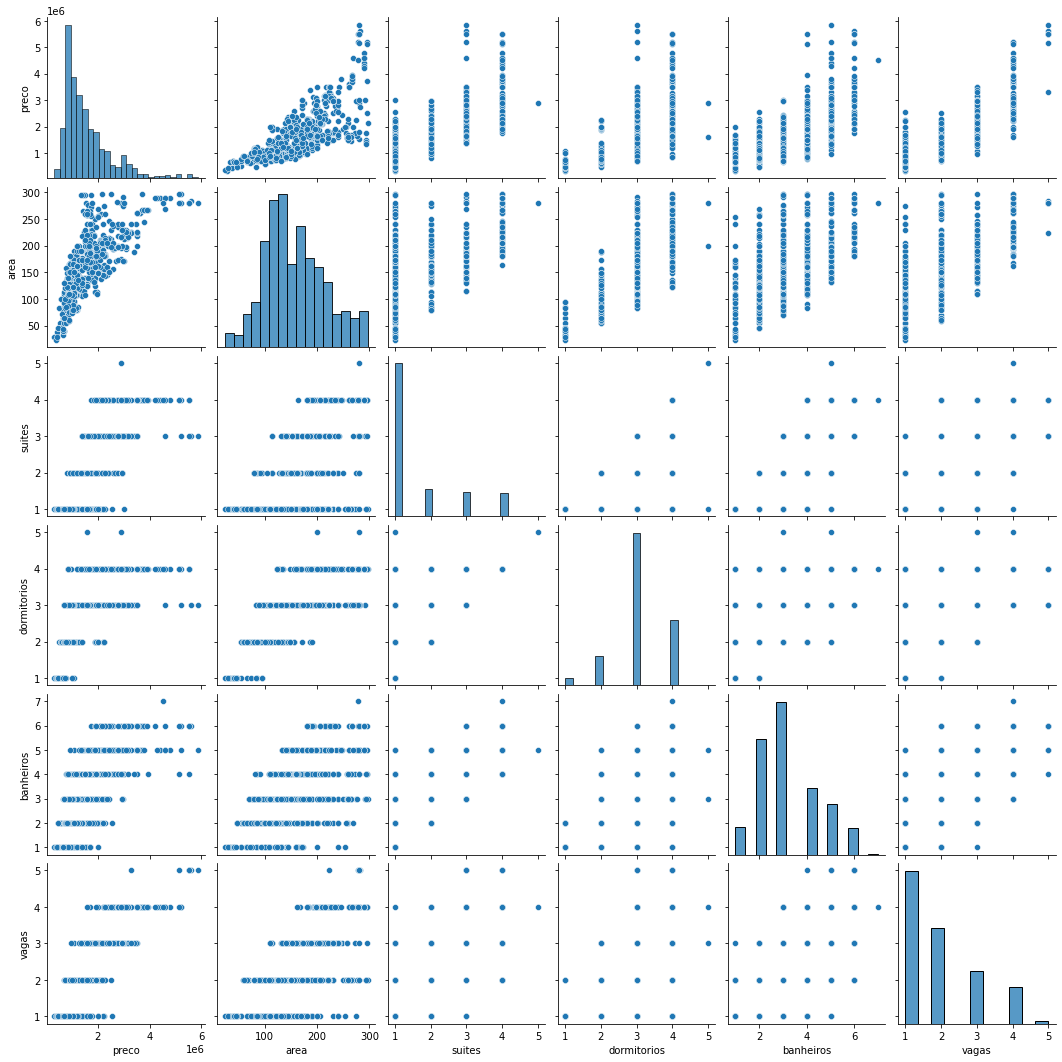

In [15]:
import seaborn as sns
sns.pairplot(df)

In [16]:
df.corr()

,preco,area,suites,dormitorios,banheiros,vagas
preco,1.000000,0.762753,0.772611,0.496607,0.699356,0.831578
area,0.762753,1.000000,0.515171,0.689718,0.575139,0.631188
suites,0.772611,0.515171,1.000000,0.425713,0.770448,0.787208
dormitorios,0.496607,0.689718,0.425713,1.000000,0.533613,0.460330
banheiros,0.699356,0.575139,0.770448,0.533613,1.000000,0.691970
vagas,0.831578,0.631188,0.787208,0.460330,0.691970,1.000000


# Divisão dos datasets

In [17]:
df.head()

,preco,area,suites,dormitorios,banheiros,vagas
794,2400000.0,213.0,4.0,4.0,6.0,3.0
795,530000.0,55.0,1.0,2.0,2.0,1.0
796,1450000.0,157.0,2.0,3.0,4.0,2.0
797,1070000.0,135.0,1.0,3.0,2.0,1.0
798,2100000.0,210.0,4.0,4.0,5.0,2.0


* dividindo o dataset em 80% para treino e 20% para teste

In [18]:
# neste código você precisa informar o percentual de exemplos que serão utilizados no teste

percentual = 0.2

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:6], df['preco'], test_size=percentual, random_state=4)

In [19]:
x_train.head()

,area,suites,dormitorios,banheiros,vagas
1349,137.0,1.0,3.0,3.0,1.0
1069,120.0,1.0,3.0,3.0,1.0
1456,82.0,2.0,2.0,4.0,2.0
1449,226.0,4.0,4.0,5.0,4.0
1532,172.0,1.0,3.0,2.0,2.0


# Criação e avaliação do modelo preditivo

Crie um modelo de regressão utilizando os algoritmos e transformações nos atributos que você considera mais adequados.

Valide o modelo desenvolvido considerando os datasets X_test e y_test. **Espera-se que o erro médio absoluto seja inferior a duzentos mil reais (R$ 200.000,00) ou o erro percentual médio é inferior a 1\%**. Onde, erro percentual é igual a:

$erro\_percentual = abs(preço\_real - preço\_preditito)$ / preço\_real

Descreva nas células abaixo todas as etapas necessárias para o desenvolvimento e validação do modelo.

## Regressão Linear

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(628, 5)
(628,)
(158, 5)


In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

### Validação do modelo no conjunto de treinamento

In [22]:
predicted = model.predict(x_train)

In [24]:
import numpy as np

def erro_percentual(real, predicted):
    return np.abs(real - predicted) / real

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error
r2 = r2_score(y_train, predicted)
mae = mean_absolute_error(y_train, predicted)
print('r2 = ', r2)
print('mae = ', mae)
print('erro percentual médio = ', sum(erro_percentual(y_train, predicted))/len(y_train)*100)

r2 =  0.8223876116718476
mae =  265630.1450275685
erro percentual médio =  16.68497147148069


Text(0.5, 1.0, 'Análise dos erros')

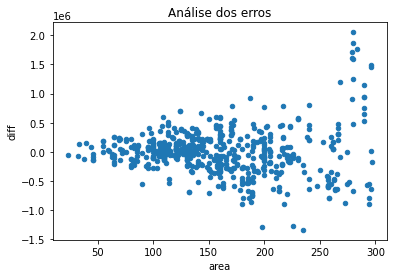

In [31]:
resultado = pd.DataFrame({'real': y_train, 'predicted': predicted, 'diff': (y_train - predicted)})
resultado = pd.concat([x_train, resultado], axis=1)
ax = resultado.plot(x='area', y='diff', kind='scatter')
ax.set_title('Análise dos erros')

### Validação do modelo no conjunto de teste

In [32]:
predicted = model.predict(x_test)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)
print('erro percentual médio = ', sum(erro_percentual(y_test, predicted))/len(predicted)*100)

rmse = % 96552254398.05544
r2 = % 0.8343976815354153
mae = % 241653.0923112497
erro percentual médio =  16.97680962932509


Text(0.5, 1.0, 'Análise dos erros')

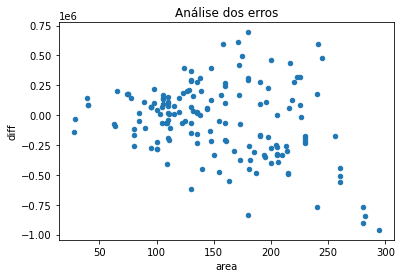

In [35]:
resultado = pd.DataFrame({'real': y_test, 'predicted': predicted, 'diff': (y_test - predicted)})
resultado = pd.concat([x_test, resultado], axis=1)
ax = resultado.plot(x='area', y='diff', kind='scatter')
ax.set_title('Análise dos erros')

## Regressão Linear com transformação polinomial

**Testar com degree igual a 2, 3, 4 e 8. Analisar possível overfitting**

In [65]:
#Generate a new feature matrix consisting of all polynomial combinations 
#of the features with degree less than or equal to the specified degree. 
#For example, if an input sample is two dimensional and of the form [a, b], 
#the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

from sklearn.preprocessing import PolynomialFeatures
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x_train)
train_ = transformer.transform(x_train)

In [66]:
print(x_train.shape)
print(train_.shape)

(628, 5)
(628, 20)


In [67]:
pd.DataFrame(train_).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,137.0,1.0,3.0,3.0,1.0,18769.0,137.0,411.0,411.0,137.0,1.0,3.0,3.0,1.0,9.0,9.0,3.0,9.0,3.0,1.0
1,120.0,1.0,3.0,3.0,1.0,14400.0,120.0,360.0,360.0,120.0,1.0,3.0,3.0,1.0,9.0,9.0,3.0,9.0,3.0,1.0
2,82.0,2.0,2.0,4.0,2.0,6724.0,164.0,164.0,328.0,164.0,4.0,4.0,8.0,4.0,4.0,8.0,4.0,16.0,8.0,4.0
3,226.0,4.0,4.0,5.0,4.0,51076.0,904.0,904.0,1130.0,904.0,16.0,16.0,20.0,16.0,16.0,20.0,16.0,25.0,20.0,16.0
4,172.0,1.0,3.0,2.0,2.0,29584.0,172.0,516.0,344.0,344.0,1.0,3.0,2.0,2.0,9.0,6.0,6.0,4.0,4.0,4.0


* Por que este dataset tem dimensões diferentes? 

In [68]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(train_, y_train)

### Validação do modelo no conjunto de treinamento

In [69]:
predicted = model.predict(train_)

In [70]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_train, predicted)
r2 = r2_score(y_train, predicted)
mae = mean_absolute_error(y_train, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)
print('erro percentual médio = ', sum(erro_percentual(y_train, predicted))/len(predicted)*100)

rmse = % 99821642995.11041
r2 = % 0.881915483445518
mae = % 226505.49237982498
erro percentual médio =  14.867175778538755


Text(0.5, 1.0, 'Análise dos erros')

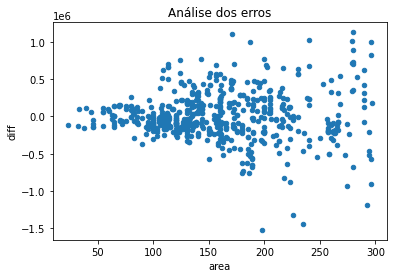

In [71]:
resultado = pd.DataFrame({'real': y_train, 'predicted': predicted, 'diff': (y_train - predicted)})
resultado = pd.concat([x_train, resultado], axis=1)
ax = resultado.plot(x='area', y='diff', kind='scatter')
ax.set_title('Análise dos erros')

### Validação do modelo no conjunto de teste

* antes de usar a função predict, você precisa aplicar a mesma transformação feita sobre o dataset x_train no dataset x_test. Preste atenção que o nome da variável esperada é test_

In [72]:
transformer.fit(x_test)
test_ = transformer.transform(x_test)

In [73]:
predicted = model.predict(test_)

In [74]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)
print('erro percentual médio = ', sum(erro_percentual(y_test, predicted))/len(predicted)*100)

rmse = % 82144881646.84306
r2 = % 0.8591085942474888
mae = % 209117.23051933342
erro percentual médio =  14.805597166947065


Text(0.5, 1.0, 'Análise dos erros')

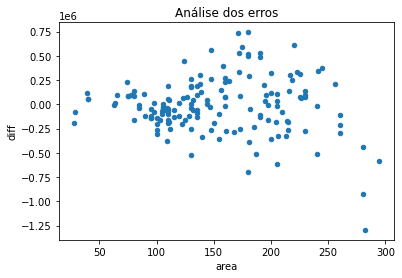

In [75]:
resultado = pd.DataFrame({'real': y_test, 'predicted': predicted, 'diff': (y_test - predicted)})
resultado = pd.concat([x_test, resultado], axis=1)
ax = resultado.plot(x='area', y='diff', kind='scatter')
ax.set_title('Análise dos erros')

## Random Forest sem modificação adicional de atributos e modificando apenas a quantidade de árvores

In [76]:
from sklearn.ensemble import RandomForestRegressor
results = pd.DataFrame(columns=['estimators','r2'])
for i in range(100, 5000, 100):
    clf = RandomForestRegressor(n_estimators=i, max_depth=None, random_state=4, oob_score=True)
    clf.fit(x_train, y_train)
    results = results.append({'estimators':i, 'r2': clf.oob_score_}, ignore_index=True)

Text(0.5, 1.0, 'Relação R2 com a quantidade de árvores utilizadas no modelo RandomForest')

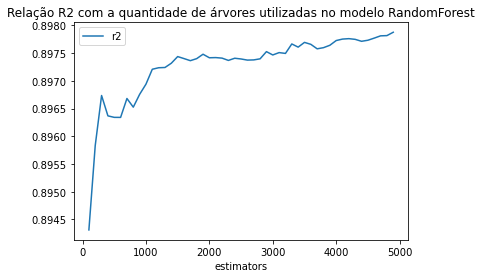

In [77]:
ax = results.plot(x='estimators', y='r2')
ax.set_title('Relação R2 com a quantidade de árvores utilizadas no modelo RandomForest')

* o modelo com 4900 árvores é o modelo com melhor $R^{2}$

In [78]:
clf = RandomForestRegressor(n_estimators=4900, max_depth=None, random_state=4, oob_score=True)

* crie o modelo usando a função fit é os datasets x_train e y_train

In [79]:
clf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=4900, oob_score=True, random_state=4)

* Nível de importância dos atributos para o modelo preditivo: 

In [80]:
print(clf.oob_score_)
print(clf.feature_importances_)
print(x_train.columns)

0.8978754005039717
[0.33587576 0.18957595 0.01128215 0.01847831 0.44478783]
Index(['area', 'suites', 'dormitorios', 'banheiros', 'vagas'], dtype='object')


### Validação do modelo no conjunto de treinamento

In [81]:
predicted = clf.predict(x_train)

In [82]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_train, predicted)
r2 = r2_score(y_train, predicted)
mae = mean_absolute_error(y_train, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)
print('erro percentual médio = ', sum(erro_percentual(y_train, predicted))/len(predicted)*100)

rmse = % 17129486081.04796
r2 = % 0.9797365879581209
mae = % 85139.64129551344
erro percentual médio =  5.8023914147073405


Text(0.5, 1.0, 'Análise dos erros')

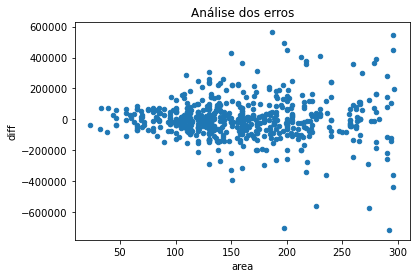

In [83]:
resultado = pd.DataFrame({'real': y_train, 'predicted': predicted, 'diff': (y_train - predicted)})
resultado = pd.concat([x_train, resultado], axis=1)
ax = resultado.plot(x='area', y='diff', kind='scatter')
ax.set_title('Análise dos erros')

### Validação do modelo no conjunto de teste

* utilize a função predict para calcular os valores preditos considerando o dataset x_test

In [84]:
predicted = clf.predict(x_test)

In [85]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)
print('erro percentual médio = ', sum(erro_percentual(y_test, predicted))/len(predicted)*100)

rmse = % 97394256154.57993
r2 = % 0.8329535159496295
mae = % 185737.0869829423
erro percentual médio =  12.16143359973253


In [87]:
y_test.describe()

count    1.580000e+02
mean     1.497887e+06
std      7.659964e+05
min      3.350000e+05
25%      8.900000e+05
50%      1.222500e+06
75%      1.918750e+06
max      3.800000e+06
Name: preco, dtype: float64

Text(0.5, 1.0, 'Análise dos erros')

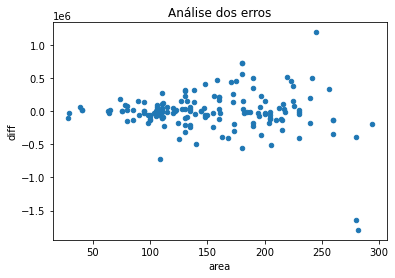

In [86]:
resultado = pd.DataFrame({'real': y_test, 'predicted': predicted, 'diff': (y_test - predicted)})
resultado = pd.concat([x_test, resultado], axis=1)
ax = resultado.plot(x='area', y='diff', kind='scatter')
ax.set_title('Análise dos erros')

## Random Forest sem modificação adicional de atributos e com GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_features': ['sqrt', 'log2', 3, 4, 5],
    'max_depth' : [2, 10, 20, 100, None]
}
rfc=RandomForestRegressor(random_state=4)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3, verbose=1, n_jobs=-1)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

In [ ]:
clf2 = RandomForestRegressor(n_estimators=1000, max_features = 'sqrt', max_depth=10, random_state=4, oob_score=True)
clf2.fit(x_train, y_train)

In [ ]:
print(clf2.oob_score_)
print(clf2.feature_importances_)
print(x_train.columns)

### Validação do modelo no conjunto de treinamento

In [ ]:
predicted = clf2.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_train, predicted)
r2 = r2_score(y_train, predicted)
mae = mean_absolute_error(y_train, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)

In [ ]:
resultado = pd.DataFrame({'real': y_train, 'predicted': predicted, 'diff': (y_train - predicted)})
resultado = pd.concat([x_train, resultado], axis=1)
ax = resultado.plot(x='area', y='diff', kind='scatter')
ax.set_title('Análise dos erros')

### Validação do modelo no conjunto de teste

In [ ]:
predicted = clf2.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)

In [ ]:
resultado = pd.DataFrame({'real': y_test, 'predicted': predicted, 'diff': (y_test - predicted)})
resultado = pd.concat([x_test, resultado], axis=1)
ax = resultado.plot(x='area', y='diff', kind='scatter')
ax.set_title('Análise dos erros')

## Random Forest com transformacao polinomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
transformer = PolynomialFeatures(degree=3, include_bias=False)
transformer.fit(x_train)
train_ = transformer.transform(x_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_features': ['sqrt', 'log2', 3, 4, 5, 6],
    'max_depth' : [2, 10, 20, 100, None]
}
rfc=RandomForestRegressor(random_state=4)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3, verbose=1, n_jobs=-1)
CV_rfc.fit(train_, y_train)
CV_rfc.best_params_

In [ ]:
clf3 = RandomForestRegressor(n_estimators=100, max_features = 'sqrt', max_depth=20, random_state=4, oob_score=True)
clf3.fit(train_, y_train)

In [ ]:
print(clf3.oob_score_)

### Validação do modelo no dataset de treinamento

In [ ]:
predicted = clf3.predict(train_)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_train, predicted)
r2 = r2_score(y_train, predicted)
mae = mean_absolute_error(y_train, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)

In [ ]:
resultado = pd.DataFrame({'real': y_train, 'predicted': predicted, 'diff': (y_train - predicted)})
resultado = pd.concat([x_train, resultado], axis=1)
ax = resultado.plot(x='area', y='diff', kind='scatter')
ax.set_title('Análise dos erros')

### Validação do modelo no conjunto de teste

In [ ]:
transformer.fit(x_test)
test_ = transformer.transform(x_test)

In [ ]:
predicted = clf3.predict(test_)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)

In [ ]:
resultado = pd.DataFrame({'real': y_test, 'predicted': predicted, 'diff': (y_test - predicted)})
resultado = pd.concat([x_test, resultado], axis=1)
ax = resultado.plot(x='area', y='diff', kind='scatter')
ax.set_title('Análise dos erros')

### Analisando os dois imóveis com erros altos no conjunto de teste

In [ ]:
temp = resultado[resultado['diff'] < -1000000]
temp

# Análise dos resultados

As abordagens testadas e os seus respectivos resultados são apresentados abaixo: 

| Modelos                                                | MAE        |
|--------------------------------------------------------|------------|
| Regressão linear                                       | 241,653.10 |
| Regressão Linear com transformação polinomial          | 226.014,80 |
| RandomForest com 4.900 árvores                         | 185.737,09 |
| RandomForest com GridSearch                            | 184.575,06 |
| RandomForest com GridSearch e transformação polinomial | 188.758,11 |

* verifique se os valores estão corretos, e;
* considerando os valores apresentados na tabela, qual é o melhor modelo? 